# Import Libraries

In [1]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

c:\Users\Acer\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv('C:/Users/Acer/Downloads/Final Project/p2-final-project-ftds-027-hck-group-002/main_model_timeseries/data_for_modelling.csv')
data.head()

,date,status,fulfilment,sales_channel,ship_service_level,category,size,amazon_standard_id,qty,currency,sales,clean_ship_state,promotion_used
0,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,B07WV4JV4D,1,INR,329.0,Maharashtra,True
1,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,B098714BZP,1,INR,574.0,Tamil Nadu,False
2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,XL,B08YN7XDSG,1,INR,824.0,Uttar Pradesh,True
3,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Set,L,B08CMHNWBN,1,INR,653.0,Chandigarh,True
4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,kurta,XXL,B08B3XF5MH,1,INR,363.0,Tamil Nadu,False


In [4]:
df = data.copy()

In [5]:
df = df.groupby('date')['sales'].sum().reset_index()

In [6]:
df.head()

,date,sales
0,2022-03-31,84013.0
1,2022-04-01,635277.0
2,2022-04-02,673257.0
3,2022-04-03,737777.0
4,2022-04-04,630021.0


In [7]:
df = df.rename(columns={'date': 'ds', 'sales': 'y'})

In [8]:
train = df.iloc[:-14]
test = df.iloc[-14:]

# Model Definiton

In [9]:
model = Prophet(weekly_seasonality=True)

# Model Training

In [10]:
model.fit(train)

19:53:11 - cmdstanpy - INFO - Chain [1] start processing
19:53:13 - cmdstanpy - INFO - Chain [1] done processing


# Model Evaluation

In [11]:
future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

In [12]:
pred_train = forecast[['ds', 'yhat']].iloc[:len(train)].reset_index(drop=True)
pred_test = forecast[['ds', 'yhat']].iloc[-14:].reset_index(drop=True)

In [13]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          91 non-null     datetime64[ns]
 1   trend                       91 non-null     float64       
 2   yhat_lower                  91 non-null     float64       
 3   yhat_upper                  91 non-null     float64       
 4   trend_lower                 91 non-null     float64       
 5   trend_upper                 91 non-null     float64       
 6   additive_terms              91 non-null     float64       
 7   additive_terms_lower        91 non-null     float64       
 8   additive_terms_upper        91 non-null     float64       
 9   weekly                      91 non-null     float64       
 10  weekly_lower                91 non-null     float64       
 11  weekly_upper                91 non-null     float64       
 

In [14]:
y_train = train['y'].reset_index(drop=True)
y_test = test['y'].reset_index(drop=True)

In [15]:
mae_train = mean_absolute_error(y_train, pred_train['yhat'])
mae_test = mean_absolute_error(y_test, pred_test['yhat'])

print(f"MAE Train : {mae_train}")
print(f"MAE Test : {mae_test}")

MAE Train : 98598.42194234872
MAE Test : 119399.49242966532


In [16]:
mape_train = mean_absolute_percentage_error(y_train, pred_train['yhat'])
mape_test = mean_absolute_percentage_error(y_test, pred_test['yhat'])

print(f"MAPE Train : {mape_train}")
print(f"MAPE Test : {mape_test}")

MAPE Train : 0.2434080431632026
MAPE Test : 0.4622350771053282


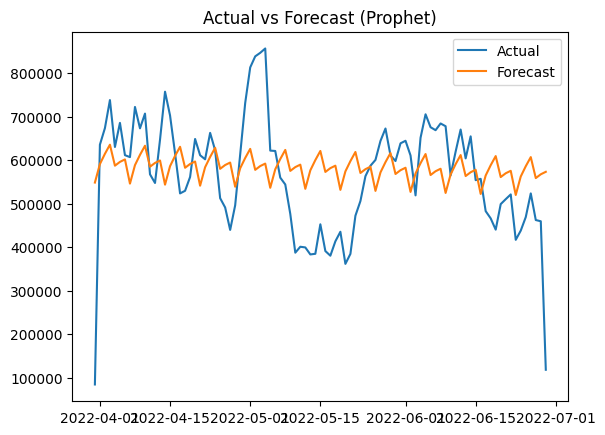

In [17]:
df['ds'] = pd.to_datetime(df['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Plot data asli
plt.plot(df['ds'], df['y'], label='Actual')

# Plot hasil prediksi Prophet
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')

plt.legend()
plt.title('Actual vs Forecast (Prophet)')
plt.show()